<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_10_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


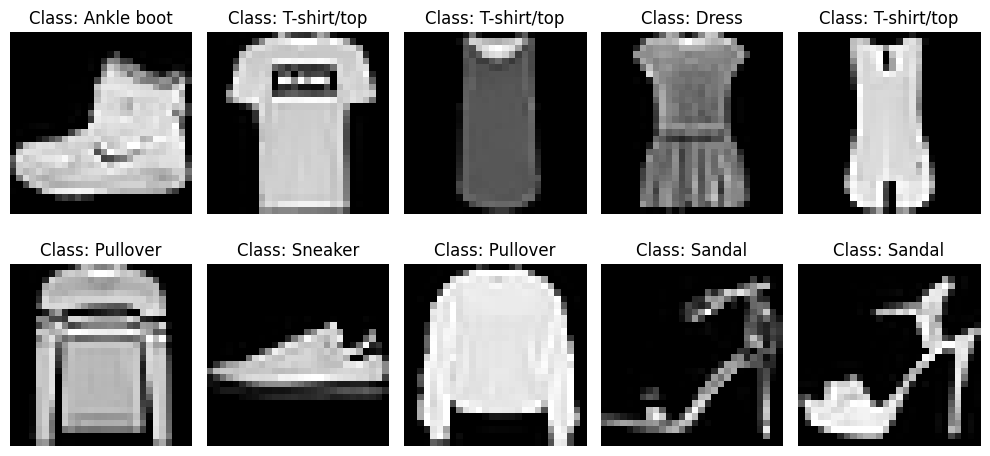

Форма тренувальних даних: (60000, 28, 28, 1)
Форма тестових даних: (10000, 28, 28, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Додавання каналу (перетворюємо вхідні зображення в 4D формат: (кількість, висота, ширина, кількість каналів))
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Список класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Виведення перших 10 зображень
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Перевіримо форми даних
print(f'Форма тренувальних даних: {x_train.shape}')
print(f'Форма тестових даних: {x_test.shape}')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Додавання каналу (формат (28, 28, 1))
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 класів Fashion MNIST
])

# Компіляція моделі
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Визначення batch size і кількість епох
batch_size = 128
epochs = 65

# Визначення callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Навчання моделі
history = model.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')


Epoch 1/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.7415 - loss: 0.7872 - val_accuracy: 0.7880 - val_loss: 0.6023 - learning_rate: 0.0010
Epoch 2/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8668 - loss: 0.3681 - val_accuracy: 0.8891 - val_loss: 0.3012 - learning_rate: 0.0010
Epoch 3/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8827 - loss: 0.3171 - val_accuracy: 0.8850 - val_loss: 0.2998 - learning_rate: 0.0010
Epoch 4/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8974 - loss: 0.2816 - val_accuracy: 0.8902 - val_loss: 0.3008 - learning_rate: 0.0010
Epoch 5/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9049 - loss: 0.2575 - val_accuracy: 0.9059 - val_loss: 0.2641 - learning_rate: 0.0010
Epoch 6/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9085 - loss: 0.2495 - val_accuracy: 0.8932 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 7/65
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9132 - loss: 0.2349 

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,070,304 (7.90 MB)

 Trainable params: 689,610 (2.63 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 1,379,222 (5.26 MB)

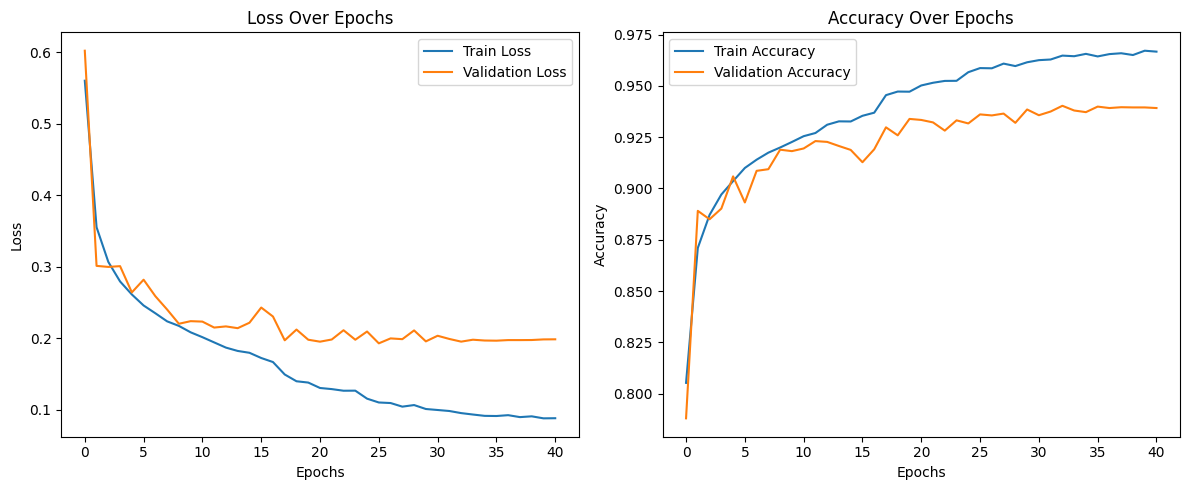

In [ ]:
import matplotlib.pyplot as plt

# Побудова графіків функції втрат
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Передбачення класів для тестового набору
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Виведення класифікаційного звіту
print(classification_report(y_test, y_pred_classes, target_names=class_names))



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.87      0.89      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.89      0.91      0.90      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.90      0.91      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.82      0.81      0.81      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



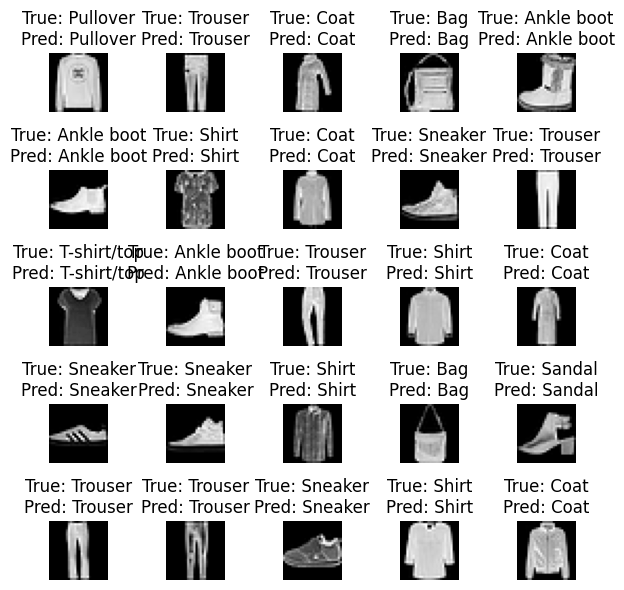

In [ ]:
# Візуалізація розпізнавання
def plot_predictions(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(6, 6))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Вибір випадкових зображень для візуалізації
indices = np.random.choice(len(x_test), 25, replace=False)
plot_predictions(x_test[indices], y_test[indices], y_pred_classes[indices], class_names)


Завданння 2.

In [ ]:
print(f"x_train shape: {x_train.shape}")

x_train shape: (60000, 28, 28, 1)


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Додаємо канал і конвертуємо в RGB
x_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))  # Тепер має форму (60000, 28, 28, 3)
x_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Змінюємо розмір зображень до (32, 32)
x_train_resized = tf.image.resize(x_train_rgb, (32, 32))
x_test_resized = tf.image.resize(x_test_rgb, (32, 32))

# Перетворюємо назад у формат numpy для подальшого використання
x_train_resized = x_train_resized.numpy()
x_test_resized = x_test_resized.numpy()

# Перевірка форми
print(f"x_train_resized shape: {x_train_resized.shape}")
print(f"x_test_resized shape: {x_test_resized.shape}")

# Завантаження базової моделі VGG16 з мінімальним розміром (32, 32, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замороження певної частини шарів
for layer in base_model.layers[:-4]:  # Можна змінити кількість заморожених шарів
    layer.trainable = False

# Додавання завершальних шарів до базової моделі
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


x_train_resized shape: (60000, 32, 32, 3)
x_test_resized shape: (10000, 32, 32, 3)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
# Визначення callback-ів
early_stopping = EarlyStopping(
    monitor='val_loss',  # Слідкуємо за втратою на валідаційних даних
    patience=10,         # Кількість епох, після яких зупиняємо навчання, якщо немає поліпшень
    restore_best_weights=True  # Відновлюємо найкращі ваги
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Слідкуємо за втратою на валідаційних даних
    factor=0.5,          # Зменшуємо швидкість навчання в 2 рази
    patience=5,          # Кількість епох, після яких зменшуємо швидкість
    min_lr=1e-6          # Мінімальна швидкість навчання
)


# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, num_classes=10)  # 10 класів у Fashion MNIST
y_test_cat = to_categorical(y_test, num_classes=10)

# Тепер модель можна навчати з використанням цих категоріальних міток
history = model.fit(
    x_train_resized,
    y_train_cat,  # Тепер ця змінна визначена
    batch_size=128,
    epochs=50,
    validation_data=(x_test_resized, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7750 - loss: 0.6788 - val_accuracy: 0.8722 - val_loss: 0.3479 - learning_rate: 1.0000e-04
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8837 - loss: 0.3332 - val_accuracy: 0.8902 - val_loss: 0.3159 - learning_rate: 1.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9002 - loss: 0.2806 - val_accuracy: 0.8927 - val_loss: 0.3079 - learning_rate: 1.0000e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9108 - loss: 0.2481 - val_accuracy: 0.8985 - val_loss: 0.2871 - learning_rate: 1.0000e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9194 - loss: 0.2250 - val_accuracy: 0.9007 - val_loss: 0.2916 - learning_rate: 1.0000e-04
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9230 - loss: 0.2095 - val_accuracy: 0.9036 - val_loss: 0.2775 - learning_rate: 1.0000e-04
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/ste

In [4]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test_cat, verbose=2)
print(f'\nТочність на тестових даних: {test_acc:.4f}')

313/313 - 6s - 20ms/step - accuracy: 0.9026 - loss: 0.2726

Точність на тестових даних: 0.9026


In [5]:
# Розморожування всіх шарів для тонкого налаштування
base_model.trainable = True

In [6]:
# Перекомпіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Донавчання моделі
history_fine = model.fit(x_train_resized, y_train_cat, epochs=15,
                         validation_split=0.2,
                         batch_size=64,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8425 - loss: 0.4504 - val_accuracy: 0.8652 - val_loss: 0.4005 - learning_rate: 0.0010
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8885 - loss: 0.3099 - val_accuracy: 0.8934 - val_loss: 0.2920 - learning_rate: 0.0010
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8989 - loss: 0.2792 - val_accuracy: 0.8884 - val_loss: 0.3084 - learning_rate: 0.0010
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9077 - loss: 0.2521 - val_accuracy: 0.8128 - val_loss: 0.5983 - learning_rate: 0.0010
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9132 - loss: 0.2457 - val_accuracy: 0.8651 - val_loss: 0.4235 - learning_rate: 0.0010
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9180 - loss: 0.2251 - val_accuracy: 0.9006 - val_loss: 0.2803 - learning_rate: 0.0010
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9222 - l

In [8]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test_cat, verbose=2)
print(f'\nТочність на тестових даних: {test_acc:.4f}')

313/313 - 3s - 8ms/step - accuracy: 0.9078 - loss: 0.2793

Точність на тестових даних: 0.9078


In [10]:
# Функція для побудови графіків
def plot_learning_curves(history, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Графік точності
    ax1.plot(history.history['accuracy'], label='Тренувальна вибірка')
    ax1.plot(history.history['val_accuracy'], label='Валідаційна вибірка')
    ax1.set_title(f'Точність моделі {title_suffix}')
    ax1.set_ylabel('Точність')
    ax1.set_xlabel('Епоха')
    ax1.legend()

    # Графік втрат
    ax2.plot(history.history['loss'], label='Тренувальна вибірка')
    ax2.plot(history.history['val_loss'], label='Валідаційна вибірка')
    ax2.set_title(f'Втрати моделі {title_suffix}')
    ax2.set_ylabel('Втрати')
    ax2.set_xlabel('Епоха')
    ax2.legend()

    plt.tight_layout()
    plt.show()

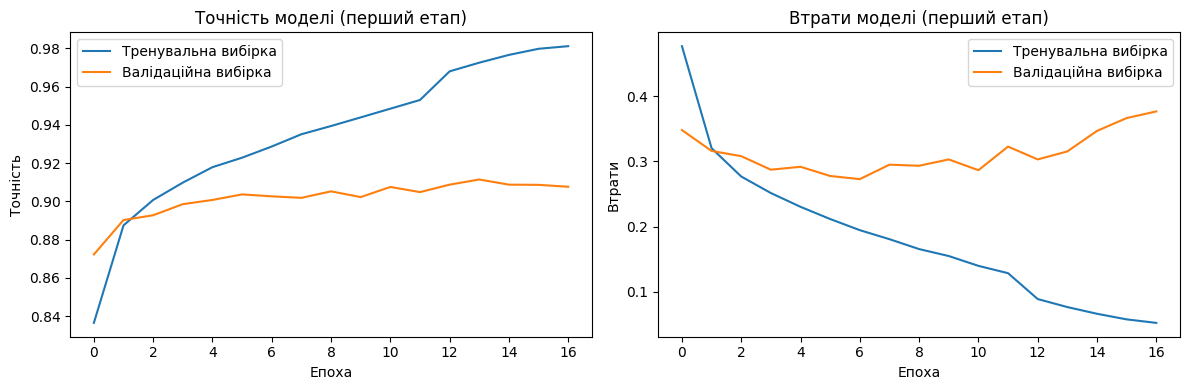

In [11]:
# Побудова графіків для першого етапу навчання
plot_learning_curves(history, "(перший етап)")

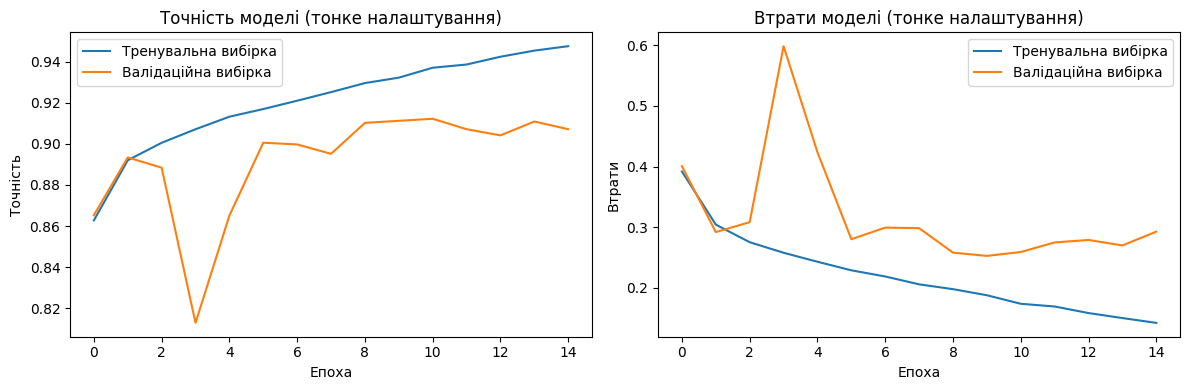

In [12]:
# Побудова графіків для етапу тонкого налаштування
plot_learning_curves(history_fine, "(тонке налаштування)")